# Ежедневная рыночная цена каждой криптовалюты

Поломарчук Максим Андреевич || ММР212 || mapolomarchuk@edu.hse.ru

[Датасет](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies)

Столбцы:
1. slug, object
2. name, object 
3. date, object 
4. ranknow, int64  
5. open, float64
6. high, float64
7. low, float64
8. close, float64
9. volume, float64
10. market, float64
11. close_ratio, float64
12. spread, float64

# Импорт библиотек / Описательный анализ датасета / Нормализация данных

Для начала импортируем необходимые для работы библиотеки

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.4f}'.format #Корректирую формат для переменных типа Float

Производим чтение датасета в расширении ".csv". Анализируемый датасет уже разделен запятыми, использовать "sep" не нужно. Выводим первые пять строк датасета.

In [2]:
df_crypto = pd.read_csv('df_crypto.csv')
df_crypto[:5]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.3000,135.9800,132.1000,134.2100,0.0000,1488566728.0000,0.5438,3.8800
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.4400,147.4900,134.0000,144.5400,0.0000,1603768865.0000,0.7813,13.4900
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.0000,146.9300,134.0500,139.0000,0.0000,1542813125.0000,0.3843,12.8800
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.0000,139.8900,107.7200,116.9900,0.0000,1298954594.0000,0.2882,32.1700
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.3800,125.6000,92.2800,105.2100,0.0000,1168517495.0000,0.3881,33.3200


Выведем информацию о строках и столбцах нашего датасета.

In [3]:
df_crypto.shape

(942297, 13)

Из информации выше видно, что наш датасет вмещает в себя свыше 900 тыс. строк и 13 столбцов.

Проверим датасет на возможные пропуски.

In [4]:
df_crypto.isnull().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

Замечаю, что все столбцы заполнены, пропусков нет.

Необходимо проверить, дублируют ли столбцы "slug" и "name" друг друга. Есть смысл облегчить достаточно крупный датасет, если данные дублируются.

In [5]:
df_crypto['slug'].value_counts()

bitcoin                            2042
litecoin                           2042
namecoin                           2042
novacoin                           2041
peercoin                           2041
                                   ... 
stacs                                 3
bitnautic-token                       2
beat                                  2
atlas-protocol                        2
blockchain-certified-data-token       2
Name: slug, Length: 2071, dtype: int64

In [6]:
df_crypto['name'].value_counts()

Bitcoin                            2042
Litecoin                           2042
Namecoin                           2042
Novacoin                           2041
Peercoin                           2041
                                   ... 
STACS                                 3
BitNautic Token                       2
BEAT                                  2
Atlas Protocol                        2
Blockchain Certified Data Token       2
Name: name, Length: 2071, dtype: int64

Как можно заметить, данные ячеек "slug" и "name" повторяются, а следовательно два одинаковых столбца не несут в себе практической значимости. Вероятнее всего столбец "slug" был создан как технический для парсинга информации в датасет.

Избавимся от колонки "slug". Вывожу первую строку датасета, чтобы убедиться в успешном удалении столбца.

In [7]:
df_crypto.drop(columns = 'slug', axis = 1, inplace = True)
df_crypto[:1]

,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,BTC,Bitcoin,2013-04-28,1,135.3000,135.9800,132.1000,134.2100,0.0000,1488566728.0000,0.5438,3.8800


In [8]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   symbol       942297 non-null  object 
 1   name         942297 non-null  object 
 2   date         942297 non-null  object 
 3   ranknow      942297 non-null  int64  
 4   open         942297 non-null  float64
 5   high         942297 non-null  float64
 6   low          942297 non-null  float64
 7   close        942297 non-null  float64
 8   volume       942297 non-null  float64
 9   market       942297 non-null  float64
 10  close_ratio  942297 non-null  float64
 11  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 86.3+ MB


Для удобства дальнейшей работы, переименовываю названия столбцов.

In [9]:
df_crypto_columns = ['Символ', 'Наименование', 'Дата', 'Ранг','Цена открытия', 'Цена высшая', 'Цена низшая',
                     'Цена закрытия', 'Объем', 'Рынок', 'Соотношение', 'Разброс']

In [10]:
df_crypto.columns = df_crypto_columns
df_crypto[:1]

,Символ,Наименование,Дата,Ранг,Цена открытия,Цена высшая,Цена низшая,Цена закрытия,Объем,Рынок,Соотношение,Разброс
0,BTC,Bitcoin,2013-04-28,1,135.3000,135.9800,132.1000,134.2100,0.0000,1488566728.0000,0.5438,3.8800


Запросим наименование всех сокращенных символов каждой криптовалюты, имеющейся в датасете.

In [11]:
df_crypto['Символ'].value_counts()

BITS     3189
PXC      2123
BTB      2049
BTM      2043
LTC      2042
         ... 
STACS       3
BCDT        2
ATP         2
BEAT        2
BTNT        2
Name: Символ, Length: 2005, dtype: int64

# Отклонения и выбросы

Для работы с отклонениями и выбросами, а также их оценкой, построим график "ящик с усами".

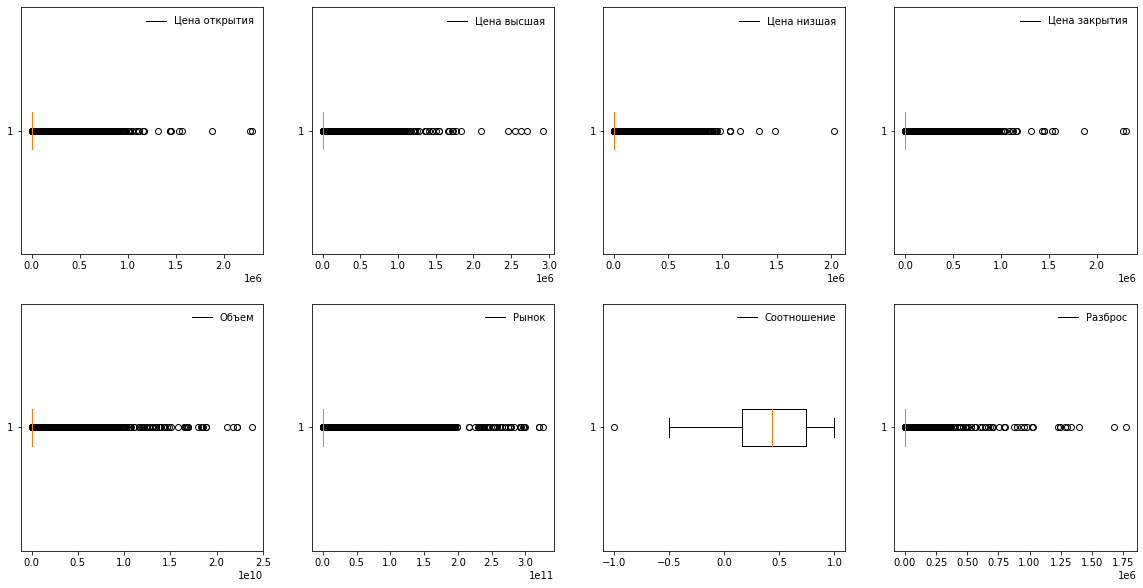

In [12]:
fig, ax = plt.subplots(2,4, figsize = (20, 10))

violin_target = ax[0][0].boxplot(df_crypto['Цена открытия'],vert = False)
ax[0][1].boxplot(df_crypto['Цена высшая'],vert = False)
ax[0][2].boxplot(df_crypto['Цена низшая'],vert = False)
ax[0][3].boxplot(df_crypto['Цена закрытия'],vert = False)
ax[1][0].boxplot(df_crypto['Объем'],vert = False)
ax[1][1].boxplot(df_crypto['Рынок'],vert = False)
ax[1][2].boxplot(df_crypto['Соотношение'],vert = False)
ax[1][3].boxplot(df_crypto['Разброс'],vert = False)

ax[0][0].legend(['Цена открытия'], frameon = False)
ax[0][1].legend(['Цена высшая'], frameon = False)
ax[0][2].legend(['Цена низшая'], frameon = False)
ax[0][3].legend(['Цена закрытия'], frameon= False)
ax[1][0].legend(['Объем'], frameon = False)
ax[1][1].legend(['Рынок'], frameon = False)
ax[1][2].legend(['Соотношение'], frameon = False)
ax[1][3].legend(['Разброс'], frameon = False)

Замечаю, что в каждом столбце имеются незначительные выбросы. Избавлюсь от выбросов в каждом столбце.

In [13]:
mean_open = df_crypto['Цена открытия'].mean()
std_open = df_crypto['Цена открытия'].std()
std_bottom_open = mean_open - 3 * std_open
std_top_open = mean_open + 3 * std_open
print(std_bottom_open, std_top_open)

-39204.7216861827 39901.42608406196


In [14]:
df_crypto[df_crypto['Цена открытия'] > std_top_open].shape

(1078, 12)

In [15]:
df_crypto[df_crypto['Цена открытия'] < std_bottom_open].shape

(0, 12)

In [16]:
df_crypto = df_crypto[df_crypto['Цена открытия'] < std_top_open]
df_crypto.shape

(941219, 12)

In [17]:
mean_high = df_crypto['Цена высшая'].mean()
std_high = df_crypto['Цена высшая'].std()
std_bottom_high = mean_high - 3 * std_high
std_top_high = mean_high + 3 * std_high
print(std_bottom_high, std_top_high)

-2307.318168693227 2390.481105291317


In [18]:
df_crypto[df_crypto['Цена высшая'] > std_top_high].shape

(2921, 12)

In [19]:
df_crypto[df_crypto['Цена высшая'] < std_bottom_high].shape

(0, 12)

In [20]:
df_crypto = df_crypto[df_crypto['Цена высшая'] < std_top_high]
df_crypto.shape

(938298, 12)

In [21]:
mean_low = df_crypto['Цена низшая'].mean()
std_low = df_crypto['Цена низшая'].std()
std_bottom_low = mean_low - 3 * std_low
std_top_low = mean_low + 3 * std_low
print(std_bottom_low, std_top_low)

-236.10227239477854 252.77701324312028


In [22]:
df_crypto[df_crypto['Цена низшая'] > std_top_low].shape

(7894, 12)

In [23]:
df_crypto[df_crypto['Цена низшая'] < std_bottom_low].shape

(0, 12)

In [24]:
df_crypto = df_crypto[df_crypto['Цена низшая'] < std_top_low]
df_crypto.shape

(930404, 12)

In [25]:
mean_close = df_crypto['Цена закрытия'].mean()
std_close = df_crypto['Цена закрытия'].std()
std_bottom_close = mean_close - 3 * std_close
std_top_close = mean_close + 3 * std_close
print(std_bottom_close, std_top_close)

-42.27009654343069 46.356857254687306


In [26]:
df_crypto[df_crypto['Цена закрытия'] > std_top_close].shape

(9064, 12)

In [27]:
df_crypto[df_crypto['Цена закрытия'] < std_bottom_close].shape

(0, 12)

In [28]:
df_crypto = df_crypto[df_crypto['Цена закрытия'] < std_top_close]
df_crypto.shape

(921340, 12)

In [29]:
mean_volume = df_crypto['Объем'].mean()
std_volume = df_crypto['Объем'].std()
std_bottom_volume = mean_volume - 3 * std_volume
std_top_volume = mean_volume + 3 * std_volume
print(std_bottom_volume, std_top_volume)

-214697135.2286587 221958315.20226023


In [30]:
df_crypto[df_crypto['Объем'] > std_top_volume].shape

(2028, 12)

In [31]:
df_crypto[df_crypto['Объем'] < std_bottom_volume].shape

(0, 12)

In [32]:
df_crypto = df_crypto[df_crypto['Объем'] < std_top_volume]
df_crypto.shape

(919312, 12)

In [33]:
mean_market = df_crypto['Рынок'].mean()
std_market = df_crypto['Рынок'].std()
std_bottom_market = mean_market - 3 * std_market
std_top_market = mean_market + 3 * std_market
print(std_bottom_market, std_top_market)

-775702876.6247742 835830685.2777603


In [34]:
df_crypto[df_crypto['Рынок'] > std_top_market].shape

(5345, 12)

In [35]:
df_crypto[df_crypto['Рынок'] < std_bottom_market].shape

(0, 12)

In [36]:
df_crypto = df_crypto[df_crypto['Рынок'] < std_top_market]
df_crypto.shape

(913967, 12)

In [37]:
mean_ratio = df_crypto['Соотношение'].mean()
std_ratio = df_crypto['Соотношение'].std()
std_bottom_ratio = mean_ratio - 3 * std_ratio
std_top_ratio = mean_ratio + 3 * std_ratio
print(std_bottom_ratio, std_top_ratio)

-0.5216692717814317 1.437824198381597


In [38]:
df_crypto[df_crypto['Соотношение'] > std_top_ratio].shape

(0, 12)

In [39]:
df_crypto[df_crypto['Соотношение'] < std_bottom_ratio].shape

(1, 12)

In [40]:
df_crypto = df_crypto[df_crypto['Соотношение'] < std_top_ratio]
df_crypto.shape

(913967, 12)

In [41]:
mean_spread = df_crypto['Разброс'].mean()
std_spread = df_crypto['Разброс'].std()
std_bottom_spread = mean_spread - 3 * std_spread
std_top_spread = mean_spread + 3 * std_spread
print(std_bottom_spread, std_top_spread)

-6.814481604143307 7.107258039178014


In [42]:
df_crypto[df_crypto['Разброс'] > std_top_spread].shape

(2218, 12)

In [43]:
df_crypto[df_crypto['Разброс'] < std_bottom_spread].shape

(0, 12)

In [44]:
df_crypto = df_crypto[df_crypto['Разброс'] < std_top_spread]
df_crypto.shape

(911749, 12)

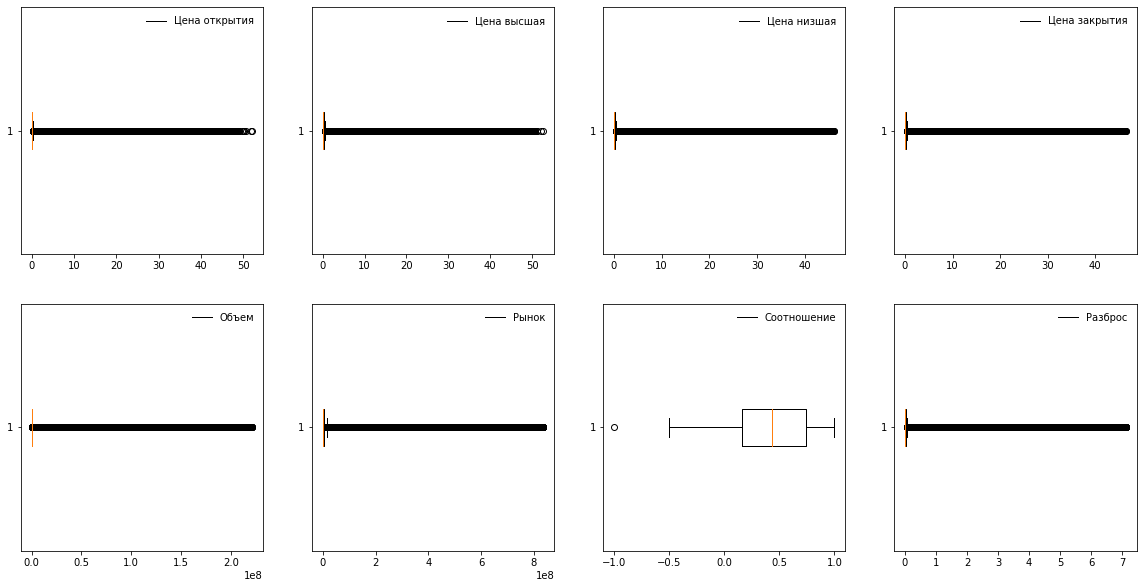

In [45]:
fig, ax = plt.subplots(2,4, figsize = (20, 10))

violin_target = ax[0][0].boxplot(df_crypto['Цена открытия'],vert = False)
ax[0][1].boxplot(df_crypto['Цена высшая'],vert = False)
ax[0][2].boxplot(df_crypto['Цена низшая'],vert = False)
ax[0][3].boxplot(df_crypto['Цена закрытия'],vert = False)
ax[1][0].boxplot(df_crypto['Объем'],vert = False)
ax[1][1].boxplot(df_crypto['Рынок'],vert = False)
ax[1][2].boxplot(df_crypto['Соотношение'],vert = False)
ax[1][3].boxplot(df_crypto['Разброс'],vert = False)

ax[0][0].legend(['Цена открытия'], frameon = False)
ax[0][1].legend(['Цена высшая'], frameon = False)
ax[0][2].legend(['Цена низшая'], frameon = False)
ax[0][3].legend(['Цена закрытия'], frameon= False)
ax[1][0].legend(['Объем'], frameon = False)
ax[1][1].legend(['Рынок'], frameon = False)
ax[1][2].legend(['Соотношение'], frameon = False)
ax[1][3].legend(['Разброс'], frameon = False)

# Статистический анализ

Используем датафрейм "numeric_variables" для анализа колличественных переменных.

In [46]:
numeric_variables = ['Цена открытия', 'Цена высшая', 'Цена низшая', 'Цена закрытия', 'Объем', 'Рынок',
                     'Соотношение', 'Разброс']

Принимаю решение оценить описательные статистики для созданного датафрейма.

In [47]:
df_crypto[numeric_variables].describe()

,Цена открытия,Цена высшая,Цена низшая,Цена закрытия,Объем,Рынок,Соотношение,Разброс
count,911749.0000,911749.0000,911749.0000,911749.0000,911749.0000,911749.0000,911749.0000,911749.0000
mean,0.6935,0.7481,0.6386,0.6903,955009.0584,16242613.4108,0.4581,0.1091
std,2.9525,3.1302,2.7578,2.9336,6413514.9603,60134906.3301,0.3266,0.4648
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000
25%,0.0021,0.0024,0.0018,0.0021,163.0000,28628.0000,0.1606,0.0000
50%,0.0210,0.0236,0.0188,0.0209,3878.0000,487250.0000,0.4301,0.0000
75%,0.1791,0.1982,0.1616,0.1784,101285.0000,6074290.0000,0.7444,0.0300
max,52.1000,52.6700,46.1700,46.3400,221380992.0000,835631550.0000,1.0000,7.1000


Исходя из описательных статистик можно сделать следующие выводы:
- Количество криптовалют, которые установили максимум за стоимость одной единицы валюты, являются меньшинством, средняя стоимость колеблется от 3,13 до 2,75 у.е.
- Цена открытия, то есть первая покупка криптовалюты, в среднем, близка к пику стоимости этой криптовалюты, при этом продажа валюты, в среднем, близка к минимуму стоимости криптовалюты. Из этого можно сделать вывод о том, что в среднем, спикуляция на криптовалюте работает в убыток для инвестора.
- В среднем, при падении стоимости криптовалюты, инвесторы стараются избавиться от нее, чтобы сохранить свои вложения.
- Цена закрытия, в среднем, всегда выше минимума стоимости криптовалюты.
- В пике популярности криптовалют 2013-2018 года, объем рынка достигал 835631550 у.е.
- Среднаяя рыночная капитализация за период 2013-2018 года, составляла 60134906 у.е.

In [48]:
cost_crypto_mean = df_crypto.groupby(df_crypto['Наименование'])['Цена открытия'].std()

In [49]:
cost_crypto_mean = df_crypto.sort_values(by = ['Наименование', 'Цена открытия'], ascending = [False, False])
cost_crypto_mean_1 = cost_crypto_mean.groupby(df_crypto['Наименование'])['Цена открытия'].std().tail()
cost_crypto_mean_1

Наименование
smARTOFGIVING   0.0177
ugChain         0.0358
vSlice          0.2885
vSportCoin      0.0007
wys Token       0.0137
Name: Цена открытия, dtype: float64

# Построение модели и поиск взаимосвязей между переменными

Построим тепловую карту коэффициентов корреляции, чтобы определить взаимосвязи между переменными.

<AxesSubplot:title={'center':'Карта коэффициентов корреляции'}>

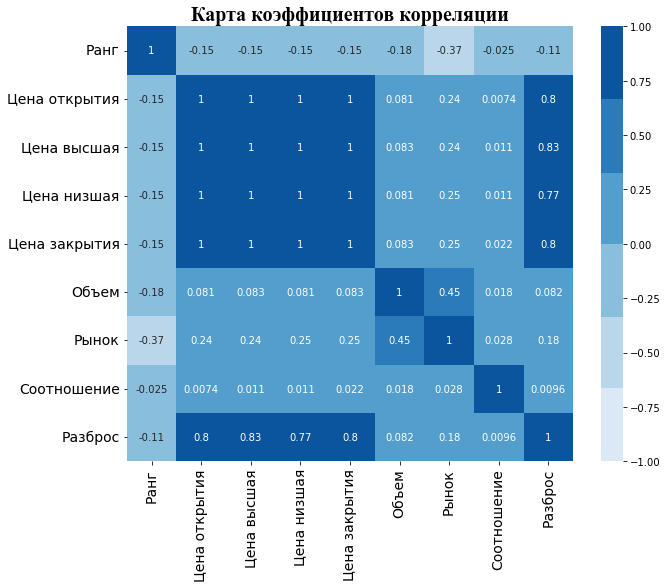

In [50]:
colormap = sns.color_palette('Blues')
plt.figure(figsize = (10, 8))
plt.title('Карта коэффициентов корреляции', fontsize = 20, font = 'Times New Roman', fontweight = 'bold')
plt.tick_params(labelsize = 14)
sns.heatmap(df_crypto.corr(), annot=True, alpha = 1, vmin = -1, vmax = 1, center = 0, cmap = colormap)

К тепловой карте применил цветовую карту Blues, для того, чтобы более явно отсеять менее значащие коэффициенты корреляции.

На основе датафрейма колличественных переменных, построим матрицу корреляционного распределения данных.

In [51]:
cost_open = df_crypto.groupby(df_crypto['Наименование'])['Цена открытия'].mean()
cost_max = df_crypto.groupby(df_crypto['Наименование'])['Цена высшая'].mean()
cost_close = df_crypto.groupby(df_crypto['Наименование'])['Цена низшая'].mean()
cost_min = df_crypto.groupby(df_crypto['Наименование'])['Цена закрытия'].mean()

crypto_name = pd.concat([cost_open, cost_max, cost_close, cost_min], axis=1)
crypto_name

,Цена открытия,Цена высшая,Цена низшая,Цена закрытия
Наименование,,,,
0chain,0.2286,0.2478,0.2077,0.2260
0x,0.6897,0.7333,0.6430,0.6877
0xBitcoin,0.7583,0.8490,0.6680,0.7522
0xcert,0.0117,0.0123,0.0106,0.0114
1World,0.1588,0.1745,0.1425,0.1575
...,...,...,...,...
smARTOFGIVING,0.1054,0.1098,0.0950,0.1050
ugChain,0.0377,0.0411,0.0344,0.0373
vSlice,0.2298,0.2536,0.2091,0.2297


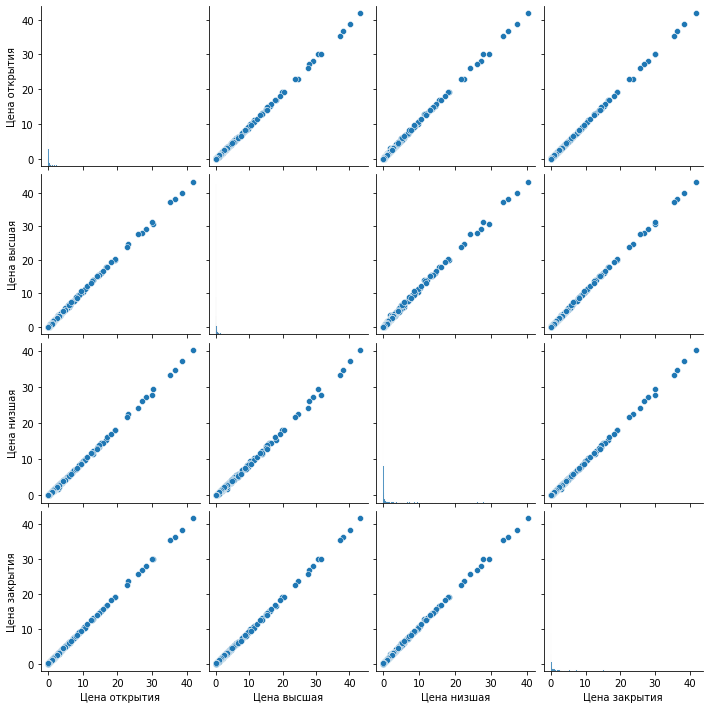

In [52]:
sns.pairplot(crypto_name)

Принимаю решение построить линейную модель, а также посчитать коэффициент детерминации.

In [53]:
import scipy.stats
import statsmodels.api as sm

x = crypto_name['Цена открытия']
y = crypto_name['Цена закрытия']

model = scipy.stats.linregress(x, y)
print(model)

LinregressResult(slope=0.9955679991269016, intercept=-0.0012476707215444138, rvalue=0.9999522670534858, pvalue=0.0, stderr=0.00021469212844920445, intercept_stderr=0.0006478760339968754)


In [54]:
determ = model.rvalue ** 2
print(determ)

0.9999045363854059


Исходя из расчетов r квадрат видно, что модель объясняет 99% выбросов модели.

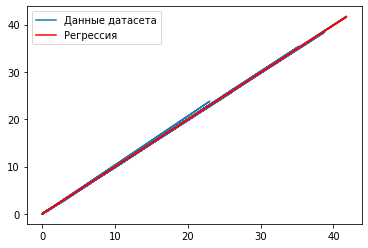

In [55]:
plt.plot(x, y, label = 'Данные датасета')
plt.plot(x, model.intercept + model.slope * x, 'r', label = 'Регрессия')
plt.legend()
plt.show()

На графике линейной модели можно заметить положительную линейную зависимость между переменными.

**Выводы**

Количество криптовалют, которые установили максимум за стоимость одной единицы валюты, являются меньшинством, средняя стоимость колеблется от 3,13 до 2,75 у.е. В рамках данного анализа, высокая стоимость некоторых криптовалют являются скорее выбросами, нежеле статистически значимыми факторами.

Цена открытия, то есть первая покупка криптовалюты, в среднем, близка к пику стоимости этой криптовалюты, при этом продажа валюты, в среднем, близка к минимуму стоимости криптовалюты. Из этого можно сделать вывод о том, что в среднем, спикуляция на криптовалюте работает в убыток для инвестора.

Можно сделать вывод о поведенческом факторе инвесторов. Растущая капитализация и объем криптовалюты привлекает инвесторов к покупке в надежде заработать на последующей спикуляции. Закономерно, что и падение стоимости криптовалюты, в среднем, приводит к продаже полного пакета активов, либо ее части, в целях сохранения имеющегося капитала.